In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [26]:
data=pd.read_csv('temperature.csv')
data

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400
...,...,...,...
7051,7051,24-10-2022 19:00,25.567
7052,7052,24-10-2022 20:00,25.183
7053,7053,24-10-2022 21:00,24.600
7054,7054,24-10-2022 22:00,23.986


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB


In [28]:
data['Datetime']=pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.set_index('Datetime',inplace=True)

In [29]:
data

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400
...,...,...
2022-10-24 19:00:00,7051,25.567
2022-10-24 20:00:00,7052,25.183
2022-10-24 21:00:00,7053,24.600


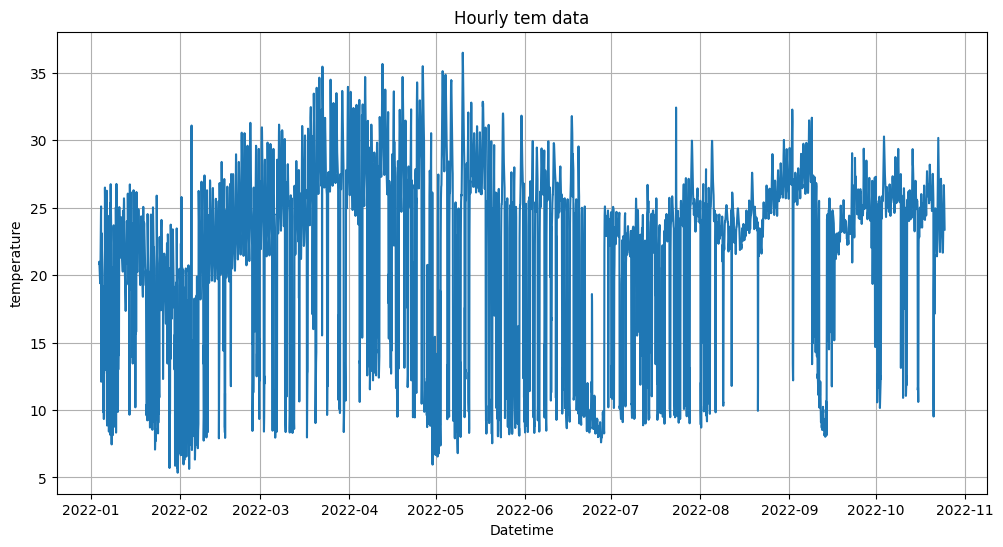

In [30]:
plt.figure(figsize=(12,6))
plt.plot(data['Hourly_Temp'])
plt.title('Hourly tem data')
plt.xlabel('Datetime')
plt.ylabel('temperature')
plt.grid(True)
plt.show()

In [31]:
def test_stationarity(timeseries):
    dftest =adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Stat','p value','#lag used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]=value

    return dfoutput
    
result= test_stationarity(data['Hourly_Temp'])
print('Augment dickey-fuller test:')
print(result)

Augment dickey-fuller test:
Test Stat                    -9.396891e+00
p value                       6.338903e-16
#lag used                     2.500000e+01
Number of observation used    7.030000e+03
Critical value (1%)          -3.431281e+00
Critical value (5%)          -2.861951e+00
Critical value (10%)         -2.566989e+00
dtype: float64


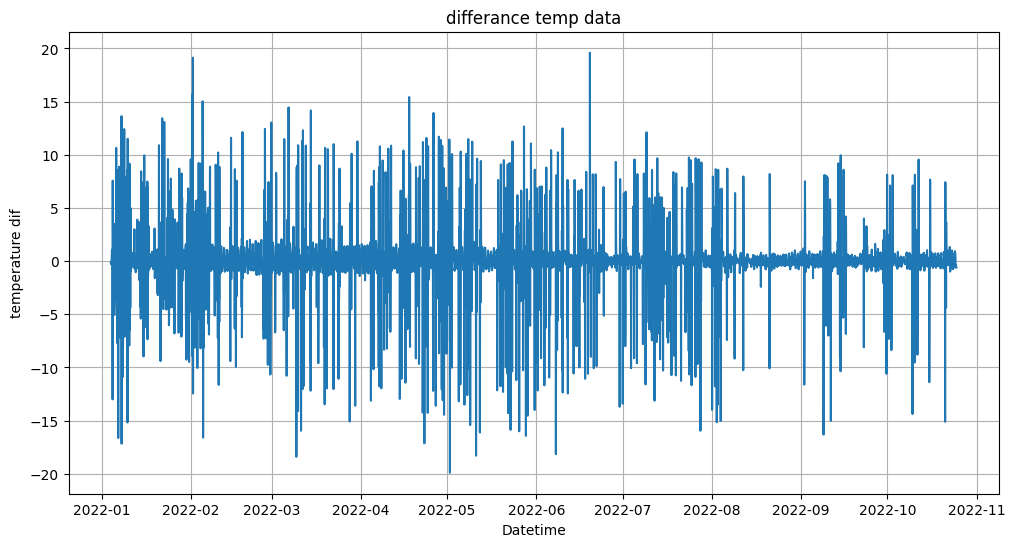

In [33]:
data['temp_diff']= data['Hourly_Temp']-data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

plt.figure(figsize=(12,6))
plt.plot(data['temp_diff'])
plt.title('differance temp data')
plt.xlabel('Datetime')
plt.ylabel('temperature dif')
plt.grid(True)
plt.show()

In [36]:
result = test_stationarity(data['temp_diff'])
print(result)

Test Stat                      -20.549529
p value                          0.000000
#lag used                       35.000000
Number of observation used    7018.000000
Critical value (1%)             -3.431282
Critical value (5%)             -2.861952
Critical value (10%)            -2.566989
dtype: float64


In [37]:
model =SARIMAX(data['Hourly_Temp'],order=(1,1,1),seasonal_order=(1,1,1,24))
result =model.fit(disp= False)

In [38]:
forcast_steps=24
forcast= result.get_forecast()